In [1]:
print(1)

1


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_excel(r"F:\Learn\cgpa_analysis\Data.xlsx")
df.head()

,Timestamp,Branch,Year?,Does your degree have a specialization?,1. Class Notes?,2. DA?,3. CGPA,4. Number of Backlogs?,5. Average Attendance? (%),6. FFCS prep,7. Exam Prep,8. Active member of Clubs/Chapters/Teams/Anything that involved Night-slips or ODs( events etc)?,9. Number of events participated in like Hackathons/Ideathons / Events related to my degree or career?,10. What's the perfect seat for your?,11. Bond with teachers.,12. Study sources?,13. Any disciplinary action?,14. Hanging out with friends after classes?,15. Sleep and Exercise?,16. Study location?,17. Room type( dayscholar/ single bed/4bed/6bed etc)
0,2025-05-04 21:48:31,IT,4th year,Nope,"One notebook for all subjects. ""If I feel like...",5+ instances where submission was done one day...,7.85,5.0,7,I choose slots on the day of FFCS and hope the...,I download the syllabus one day before. [Last ...,"Yes, I just want OD",2.0,First/second bench,They usually know me by face,"Important topic slides, youtube, books",Yes,I exhaust my outing time and I wish there was ...,8+ hours | Exercise regularly,Room,6.0
1,2025-05-04 21:50:20,CSE (and its spl),4th year,Yep,What notes? [no notes maintained],Login: 11:55 => Submit: 11:59 [Saved in time],9.15,0.0,3,"I check profs, slots and have backup timetable...",I download the syllabus one day before. [Last ...,"Yes, but I compensate for my academics somehow.",2.0,"If there is something beyond last bench, I'd c...",They wouldn't recognize me at all.,All slides and youtube,No,30min - 1hr on somedays,4-6 hours | Occasionally exercise,Room,2.0
2,2025-05-04 21:51:01,ECE (and its spl),4th year,Yep,I carry 3 pens to class. [Pro level notes],I panic if it's not done by 11pm. [On time],9.1,1.0,9,"I check profs, slots and have backup timetable...",I start anytime in the previous week of exam. ...,"Yes, but I compensate for my academics somehow.",2.0,First/second bench,They'd notice if I didn't attend the class.,All slides and youtube,No,30min - 1hr on somedays,4-6 hours | Occasionally exercise,Room,4.0
3,2025-05-04 21:51:21,ECE (and its spl),4th year,Yep,I make notes that I can understand. [Well main...,I panic if it's not done by 11pm. [On time],8.65,2.0,9,"I check profs, slots and have backup timetable...",I start anytime in the previous week of exam. ...,"Yes, I want to gain experience.",10.0,First/second bench,They usually know me by face,"Important topic slides, youtube, books",No,30min - 1hr on somedays,6-8 hours | Exercise a few times a week,Library,4.0
4,2025-05-04 21:52:27,EEE/EIE (and its spl),4th year,Nope,"One notebook for all subjects. ""If I feel like...",Login: 11:55 => Submit: 11:59 [Saved in time],7.38,0.0,8,"I check profs, slots and have backup timetable...",I download the syllabus one day before. [Last ...,"Yes, I want to gain experience.",10.0,Somewhere in the middle,They'd notice if I didn't attend the class.,"Important topic slides, youtube, books",No,I exhaust my outing time and I wish there was ...,4-6 hours | Occasionally exercise,Room,2.0


In [4]:
df.columns

Index(['Timestamp', 'Branch', 'Year?',
       'Does your degree have a specialization?', '1. Class Notes?', '2. DA?',
       '3. CGPA', '4. Number of Backlogs?', '5. Average Attendance? (%)',
       '6. FFCS prep', '7. Exam Prep',
       '8. Active member of Clubs/Chapters/Teams/Anything that involved Night-slips or ODs( events etc)?',
       '9. Number of events participated in like Hackathons/Ideathons / Events related to my degree or career?',
       '10. What's the perfect seat for your?', '11. Bond with teachers.',
       '12. Study sources?', '13. Any disciplinary action?',
       '14. Hanging out with friends after classes?',
       '15. Sleep and Exercise?', '16. Study location?',
       '17. Room type( dayscholar/ single bed/4bed/6bed etc)'],
      dtype='object')

In [5]:
df.rename(columns={
    'Year?':'year',
     'Does your degree have a specialization?':"spl",
     '1. Class Notes?':"class_notes",
     '2. DA?':"da",
     '3. CGPA':"cgpa",
     '4. Number of Backlogs?':'backlogs',
     '5. Average Attendance? (%)':"attendance",
     '6. FFCS prep':"ffcs",
      '7. Exam Prep':"exam_prep",
      '8. Active member of Clubs/Chapters/Teams/Anything that involved Night-slips or ODs( events etc)?':"clubs_chapters",
      '9. Number of events participated in like Hackathons/Ideathons / Events related to my degree or career?':"competitions",
      "10. What's the perfect seat for your?":"seating_arrangement",
      '11. Bond with teachers.':"bond_teachers",
      '12. Study sources?':"study_material",
      '13. Any disciplinary action?':"disciplinary_action",
       '14. Hanging out with friends after classes?':"social_life",
       '15. Sleep and Exercise?':"lifestyle",
        '16. Study location?': "study_location",
        '17. Room type( dayscholar/ single bed/4bed/6bed etc)':"room_type"

}, inplace=True)

In [6]:
df.head()

,Timestamp,Branch,year,spl,class_notes,da,cgpa,backlogs,attendance,ffcs,exam_prep,clubs_chapters,competitions,seating_arrangement,bond_teachers,study_material,disciplinary_action,social_life,lifestyle,study_location,room_type
0,2025-05-04 21:48:31,IT,4th year,Nope,"One notebook for all subjects. ""If I feel like...",5+ instances where submission was done one day...,7.85,5.0,7,I choose slots on the day of FFCS and hope the...,I download the syllabus one day before. [Last ...,"Yes, I just want OD",2.0,First/second bench,They usually know me by face,"Important topic slides, youtube, books",Yes,I exhaust my outing time and I wish there was ...,8+ hours | Exercise regularly,Room,6.0
1,2025-05-04 21:50:20,CSE (and its spl),4th year,Yep,What notes? [no notes maintained],Login: 11:55 => Submit: 11:59 [Saved in time],9.15,0.0,3,"I check profs, slots and have backup timetable...",I download the syllabus one day before. [Last ...,"Yes, but I compensate for my academics somehow.",2.0,"If there is something beyond last bench, I'd c...",They wouldn't recognize me at all.,All slides and youtube,No,30min - 1hr on somedays,4-6 hours | Occasionally exercise,Room,2.0
2,2025-05-04 21:51:01,ECE (and its spl),4th year,Yep,I carry 3 pens to class. [Pro level notes],I panic if it's not done by 11pm. [On time],9.1,1.0,9,"I check profs, slots and have backup timetable...",I start anytime in the previous week of exam. ...,"Yes, but I compensate for my academics somehow.",2.0,First/second bench,They'd notice if I didn't attend the class.,All slides and youtube,No,30min - 1hr on somedays,4-6 hours | Occasionally exercise,Room,4.0
3,2025-05-04 21:51:21,ECE (and its spl),4th year,Yep,I make notes that I can understand. [Well main...,I panic if it's not done by 11pm. [On time],8.65,2.0,9,"I check profs, slots and have backup timetable...",I start anytime in the previous week of exam. ...,"Yes, I want to gain experience.",10.0,First/second bench,They usually know me by face,"Important topic slides, youtube, books",No,30min - 1hr on somedays,6-8 hours | Exercise a few times a week,Library,4.0
4,2025-05-04 21:52:27,EEE/EIE (and its spl),4th year,Nope,"One notebook for all subjects. ""If I feel like...",Login: 11:55 => Submit: 11:59 [Saved in time],7.38,0.0,8,"I check profs, slots and have backup timetable...",I download the syllabus one day before. [Last ...,"Yes, I want to gain experience.",10.0,Somewhere in the middle,They'd notice if I didn't attend the class.,"Important topic slides, youtube, books",No,I exhaust my outing time and I wish there was ...,4-6 hours | Occasionally exercise,Room,2.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            200 non-null    datetime64[ns]
 1   Branch               200 non-null    object        
 2   year                 200 non-null    object        
 3   spl                  200 non-null    object        
 4   class_notes          199 non-null    object        
 5   da                   200 non-null    object        
 6   cgpa                 200 non-null    object        
 7   backlogs             199 non-null    float64       
 8   attendance           200 non-null    int64         
 9   ffcs                 199 non-null    object        
 10  exam_prep            198 non-null    object        
 11  clubs_chapters       198 non-null    object        
 12  competitions         197 non-null    float64       
 13  seating_arrangement  198 non-null  

Nulls at:
class notes, backlogs, ffcs, exam_prep,club_chapters,competitions, seating arrangement, bong_teachers, study_material, disciplinary_action,
social_life, lifestyle, study_location, room_type

cgpa is object. Should have been float. 
this field is an indicator to bogus data points. rows with incorrect entries can be dropped. 

In [8]:
df['cgpa'][df['cgpa'].apply(lambda x: isinstance(x,str))]

6         Kya karoge jaan ke?
22                     8.36.0
61                          😛
75              Who kya howe?
83     Nahi bataunga(jk 8.52)
95                   *secret*
115    Nah dude too personal.
122                     8-8.5
132             Dont remember
148                        9+
158                  Nice try
Name: cgpa, dtype: object

We need to handle the information given to us. 
- Some of them are genuine. Eg 8.3.3 (typo)
- 9+ (will take 9)
- Nahi bataunga(jk 8.52)	
- 8-8.5	

regex maybe?

In [9]:
import re
def clean_gpa(gpa):
    gpa = gpa.strip()
    s =  re.findall(r"\d| \d.\d|\d.\d\d", gpa)
    i = float((s[0] if isinstance(s,list) else s) if s else "-1")
    # i = float(.join(s).strip())
    # print(i)
    return i
clean_gpa(" Kya karoge jaan ke?")


-1.0

In [10]:
df.head()

,Timestamp,Branch,year,spl,class_notes,da,cgpa,backlogs,attendance,ffcs,exam_prep,clubs_chapters,competitions,seating_arrangement,bond_teachers,study_material,disciplinary_action,social_life,lifestyle,study_location,room_type
0,2025-05-04 21:48:31,IT,4th year,Nope,"One notebook for all subjects. ""If I feel like...",5+ instances where submission was done one day...,7.85,5.0,7,I choose slots on the day of FFCS and hope the...,I download the syllabus one day before. [Last ...,"Yes, I just want OD",2.0,First/second bench,They usually know me by face,"Important topic slides, youtube, books",Yes,I exhaust my outing time and I wish there was ...,8+ hours | Exercise regularly,Room,6.0
1,2025-05-04 21:50:20,CSE (and its spl),4th year,Yep,What notes? [no notes maintained],Login: 11:55 => Submit: 11:59 [Saved in time],9.15,0.0,3,"I check profs, slots and have backup timetable...",I download the syllabus one day before. [Last ...,"Yes, but I compensate for my academics somehow.",2.0,"If there is something beyond last bench, I'd c...",They wouldn't recognize me at all.,All slides and youtube,No,30min - 1hr on somedays,4-6 hours | Occasionally exercise,Room,2.0
2,2025-05-04 21:51:01,ECE (and its spl),4th year,Yep,I carry 3 pens to class. [Pro level notes],I panic if it's not done by 11pm. [On time],9.1,1.0,9,"I check profs, slots and have backup timetable...",I start anytime in the previous week of exam. ...,"Yes, but I compensate for my academics somehow.",2.0,First/second bench,They'd notice if I didn't attend the class.,All slides and youtube,No,30min - 1hr on somedays,4-6 hours | Occasionally exercise,Room,4.0
3,2025-05-04 21:51:21,ECE (and its spl),4th year,Yep,I make notes that I can understand. [Well main...,I panic if it's not done by 11pm. [On time],8.65,2.0,9,"I check profs, slots and have backup timetable...",I start anytime in the previous week of exam. ...,"Yes, I want to gain experience.",10.0,First/second bench,They usually know me by face,"Important topic slides, youtube, books",No,30min - 1hr on somedays,6-8 hours | Exercise a few times a week,Library,4.0
4,2025-05-04 21:52:27,EEE/EIE (and its spl),4th year,Nope,"One notebook for all subjects. ""If I feel like...",Login: 11:55 => Submit: 11:59 [Saved in time],7.38,0.0,8,"I check profs, slots and have backup timetable...",I download the syllabus one day before. [Last ...,"Yes, I want to gain experience.",10.0,Somewhere in the middle,They'd notice if I didn't attend the class.,"Important topic slides, youtube, books",No,I exhaust my outing time and I wish there was ...,4-6 hours | Occasionally exercise,Room,2.0


In [11]:
temp = df['cgpa'][df['cgpa'].apply(lambda x: isinstance(x,str))].apply(lambda x: x if (isinstance(x,float) or isinstance(x,int)) else clean_gpa(x))
temp

6     -1.0
22     8.0
61    -1.0
75    -1.0
83     8.5
95    -1.0
115   -1.0
122    8.0
132   -1.0
148    9.0
158   -1.0
Name: cgpa, dtype: float64

In [12]:
df['cgpa'] = df['cgpa'].apply(lambda x: x if (isinstance(x,float) or isinstance(x,int)) else clean_gpa(x))

In [13]:
df_processed = df.loc[(df['cgpa']>0) & (df['cgpa']<=10)].copy()

In [14]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 0 to 199
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            190 non-null    datetime64[ns]
 1   Branch               190 non-null    object        
 2   year                 190 non-null    object        
 3   spl                  190 non-null    object        
 4   class_notes          189 non-null    object        
 5   da                   190 non-null    object        
 6   cgpa                 190 non-null    float64       
 7   backlogs             189 non-null    float64       
 8   attendance           190 non-null    int64         
 9   ffcs                 189 non-null    object        
 10  exam_prep            188 non-null    object        
 11  clubs_chapters       188 non-null    object        
 12  competitions         188 non-null    float64       
 13  seating_arrangement  189 non-null    obj

# Columns

In [15]:
df_processed.fillna("Not Answered").info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 0 to 199
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            190 non-null    datetime64[ns]
 1   Branch               190 non-null    object        
 2   year                 190 non-null    object        
 3   spl                  190 non-null    object        
 4   class_notes          190 non-null    object        
 5   da                   190 non-null    object        
 6   cgpa                 190 non-null    float64       
 7   backlogs             190 non-null    object        
 8   attendance           190 non-null    int64         
 9   ffcs                 190 non-null    object        
 10  exam_prep            190 non-null    object        
 11  clubs_chapters       190 non-null    object        
 12  competitions         190 non-null    object        
 13  seating_arrangement  190 non-null    obj

## Branch

In [17]:
df_9ptrs = df_processed.loc[df_processed['cgpa']>=9]
df_9ptrs.shape

(57, 21)

<Axes: xlabel='Branch'>

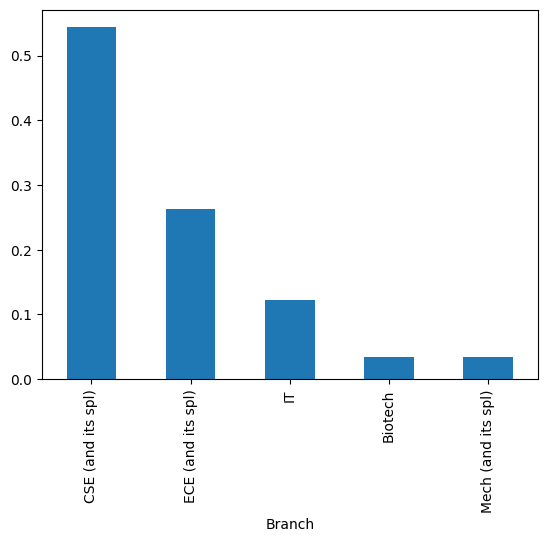

In [18]:
df_9ptrs['Branch'].value_counts(normalize=True).plot(kind='bar')

<Axes: ylabel='Branch'>

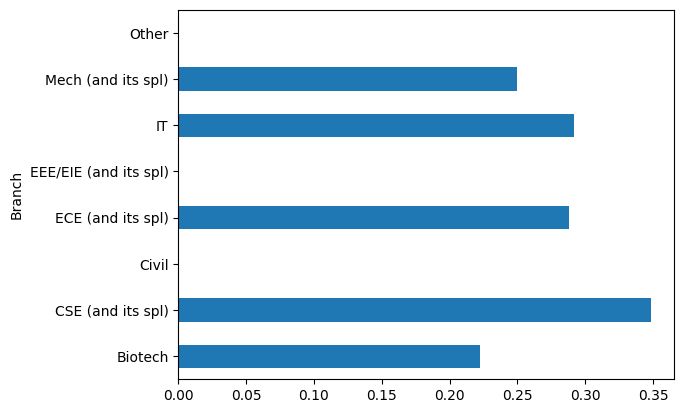

In [19]:
df_processed.groupby('Branch')['cgpa'].apply(lambda x: (x>=9).mean()).dropna().plot(kind='barh')

## spl

In [ ]:
import plotly.graph_objects as go
spl_counts = df_9ptrs['spl'].value_counts()
fig = go.Figure(data=[go.Pie(labels=spl_counts.index, values=spl_counts)])
fig.show()

In [72]:
df_processed['9ptrs'] = df_processed['cgpa'].apply(lambda x: 1 if x >9 else 0)


In [ ]:
df_processed['9ptrs'].value_counts()

9ptrs
0    142
1     48
Name: count, dtype: int64

<Axes: xlabel='9ptrs', ylabel='count'>

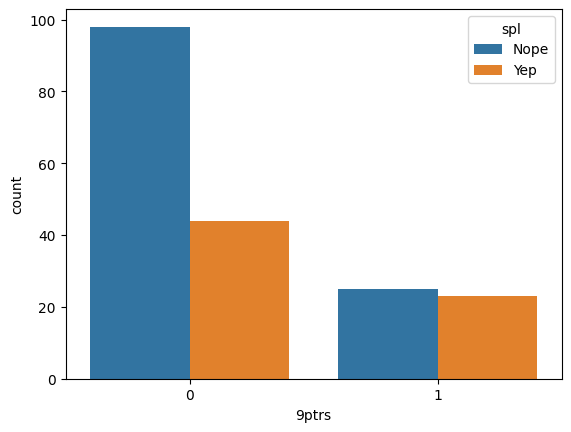

In [ ]:
sns.countplot(x ='9ptrs', hue='spl', data = df_processed)

In [105]:
df_processed.groupby('spl')['9ptrs'].sum()
# df_processed['spl'].value_counts()

spl
Nope    25
Yep     23
Name: 9ptrs, dtype: int64

In [ ]:
# def GroupBranch(df):
branch_counts = df_processed['Branch'].value_counts()
Branch_processed = branch_counts.loc[branch_counts<8].index.tolist() + ['Other']



['EEE/EIE (and its spl)', 'Other', 'Civil', 'Other']